In [2]:
import pandas as pd
#Pandas는 파이썬에서 사용하는 데이터분석 라이브러리로
#행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구이다.
#데이터 조작과 분석을 위한 파이썬 소프트웨어 라이브러리

In [6]:
#file_path = "./price_data.csv"

##df = dataframe
#df = pd.read_csv(file_path)  

from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

query = """
   SELECT * FROM `sixth-tempo-323301.test_poc_dataset.cabbage-predict`
"""

#From 프로젝트명.데이터세트명.테이블명

df = client.query(query).to_dataframe()

df

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20121205,0.0,-3.8,5.4,6.7,2600
1,20130204,2.0,-1.6,6.3,4.2,3702
2,20110301,2.5,-0.4,5.6,3.2,4710
3,20151203,3.0,-0.3,6.5,3.0,2240
4,20160228,4.0,-0.5,10.5,5.8,3147
...,...,...,...,...,...,...
2917,20140726,25.6,21.6,29.5,1.8,2938
2918,20150727,26.6,23.5,30.4,1.8,2821
2919,20160823,27.3,23.6,32.2,1.8,5472
2920,20140108,2.1,-1.4,5.3,1.8,2429


In [7]:
#dataframe의 행열갯수 (2922줄, 6열)
df.shape

(2922, 6)

In [12]:
df.head()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20121205,0.0,-3.8,5.4,6.7,2600
1,20130204,2.0,-1.6,6.3,4.2,3702
2,20110301,2.5,-0.4,5.6,3.2,4710
3,20151203,3.0,-0.3,6.5,3.0,2240
4,20160228,4.0,-0.5,10.5,5.8,3147


In [8]:
data_features = ['avgTemp', 'minTemp', 'maxTemp', 'rainFall']

In [9]:
#X는 특색, 대문자로 하자고 정함
X = df[data_features]
X.head()

,avgTemp,minTemp,maxTemp,rainFall
0,0.0,-3.8,5.4,6.7
1,2.0,-1.6,6.3,4.2
2,2.5,-0.4,5.6,3.2
3,3.0,-0.3,6.5,3.0
4,4.0,-0.5,10.5,5.8


In [10]:
X.describe()
# describe() 함수는 DataFrame의 계산 가능한 값들에 대한 다양한 계산 값을 보여준다.

,avgTemp,minTemp,maxTemp,rainFall
count,2922.000000,2922.000000,2922.000000,2922.000000
mean,12.980527,8.288227,18.378645,3.445140
std,9.790108,10.232362,9.803192,8.563899
min,-10.800000,-14.800000,-7.400000,0.000000
25%,4.200000,-0.700000,9.700000,0.000000
50%,13.950000,8.700000,19.950000,0.100000
75%,21.700000,17.575000,27.100000,2.175000
max,29.900000,25.900000,35.600000,95.500000


In [11]:
y = df.avgPrice

In [12]:
y.head()

0    2600
1    3702
2    4710
3    2240
4    3147
Name: avgPrice, dtype: int64

In [13]:
#종류 1
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

In [14]:
#모델 훈련(의사결정 알고리즘을 사용하영 모델 훈련)
# X,y를 모델 훈련을 위해 "적합"한다 > 적합한 후 훈련을 진행한다
model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [15]:
# 모델 학습 후, 결과 점수 평가
#99%는 과적합한 데이터
model.score(X,y)

0.999125889221821

In [16]:
# 실제 예측을 돌려보기
avgTemp = -4.9
minTemp = -11
maxTemp = 0.9
rainFall = 0

In [17]:
input_features = [[avgTemp, minTemp, maxTemp, rainFall]]

In [18]:
result = model.predict(input_features)

In [19]:
print ('배추예상값 : ', result[0], '원')

배추예상값 :  2123.0 원


In [20]:
import joblib
joblib.dump(model, './model/cabb_model.pkl')

['./model/cabb_model.pkl']

In [21]:
loaded_model = joblib.load('./model/cabb_model.pkl')
score = loaded_model.score(X,y)
print(score)

0.999125889221821


In [22]:
avgTemp = 5
minTemp = -11
maxTemp = 0.9
rainFall = 1

In [23]:
input_features = [[avgTemp, minTemp, maxTemp, rainFall]]

In [24]:
print('배추 예상값 : ', result[0], '원')

배추 예상값 :  2123.0 원


In [32]:
result = model.predict(input_features)
print('배추 예상값 : ', result[0], '원')

배추 예상값 :  3617.0 원


In [34]:
result

array([2123.])

In [36]:
model.predict(X)

array([2600., 3702., 4710., ..., 5472., 2429., 2800.])

In [28]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

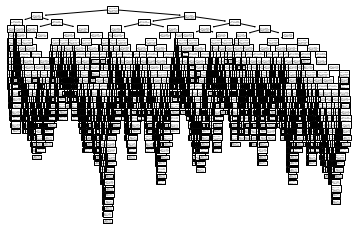

In [30]:
plot_tree(model)
plt.show()